In [1]:
#Import librariries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import pickle


In [43]:
#Import dataset
data = pd.read_csv('C:\Projects_VScode\Sentiment Analysis\static\IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Class value counts

data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
#Data describe

data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Axes: >

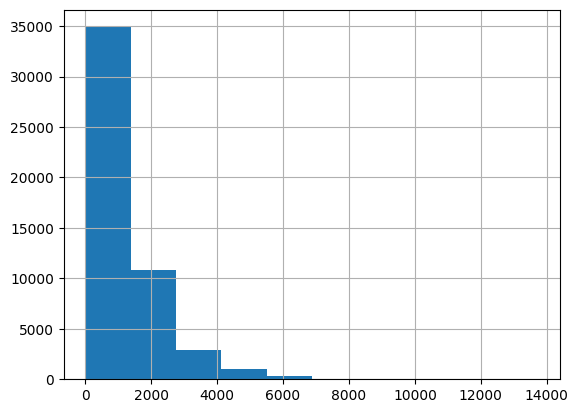

In [ ]:
#text legth histogram

data["review"].str.len().hist()

Text(0.5, 1.0, 'Negative Reviews Length')

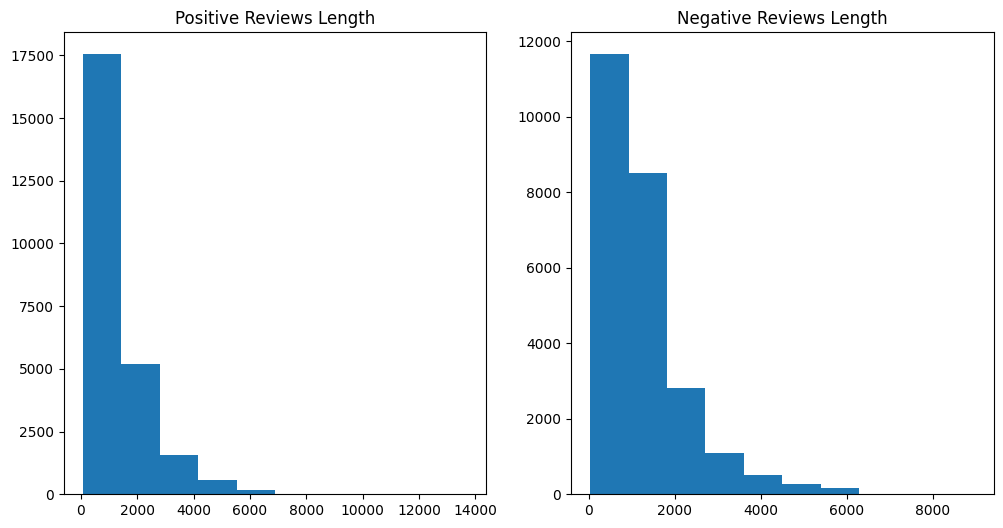

In [ ]:
#Positive and negative sentiments text length

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
 
ax1.hist(data[data["sentiment"]=="positive"]["review"].str.len())
ax1.set_title("Positive Reviews Length")

ax2.hist(data[data["sentiment"]=="negative"]["review"].str.len())
ax2.set_title("Negative Reviews Length")

#Text processing and cleaning
1. Convert text to lowercase
2. Remove punctuation, url links
3. Remove stop words
4. Remove alphanumeric characters
5. Stemming or lemmatization
6. Remove frequent words

In [44]:
#1.Convert text to lowercase
data['review_step1'] = data['review'].str.lower()

In [45]:
# Remove punchuation
data['review_step2'] = data['review_step1'].str.replace('[^\w\s]', '', regex=True)

# Remove url links
data['review_step2'] = data['review_step2'].str.replace(r'http\S+|www\S+|https\S+', '', case=False, regex=True)

In [47]:
# Remove alphanumeric characters
data['review_step3'] = data['review_step2'].str.replace('\d+', '', regex=True)  

In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data['review_step4'] = data['review_step3'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
#Stemming or lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [52]:
data['review_step5'] = data['review_step4'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
data['review_step6'] = data['review_step5'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [54]:
#Create a dataset of most frequent words

word_counts = Counter(' '.join(data['review_step6']).split())
most_common_words = word_counts.most_common(20)
most_common_words


[('br', 114877),
 ('movi', 98981),
 ('film', 92079),
 ('one', 53314),
 ('like', 43990),
 ('time', 29804),
 ('good', 28988),
 ('make', 28613),
 ('get', 27749),
 ('see', 27693),
 ('charact', 27602),
 ('watch', 27281),
 ('even', 25046),
 ('stori', 24272),
 ('would', 24024),
 ('realli', 22952),
 ('go', 22429),
 ('scene', 20706),
 ('show', 19407),
 ('well', 19310)]

In [67]:
#remove most frequent words from the dataset
freq_words = set( word for word, count in most_common_words)

#save the most frequent words to a file
with open('most_frequent_words.pkl', 'wb') as f:
    pickle.dump(freq_words, f)

def remove_most_frequent_words(text):
    return ' '.join([word for word in text.split() if word not in freq_words])
        
data['review_step7'] = data['review_step6'].apply(remove_most_frequent_words)

In [60]:
data.head()

,review,sentiment,review_step1,review_step2,review_step3,review_step4,review_step5,review_step6,review_step7
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...,one reviewer mentioned watching oz episode you...,one review mention watch oz episod youll hook ...,review mention oz episod youll hook right exac...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wonderful little production br br the filmin...,a wonderful little production br br the filmin...,wonderful little production br br filming tech...,wonderful little production br br filming tech...,wonder littl product br br film techniqu unass...,wonder littl product techniqu unassum oldtimeb...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...,thought wonder way spend hot summer weekend si...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically theres a family where a little boy j...,basically theres a family where a little boy j...,basically theres family little boy jake thinks...,basically there family little boy jake think t...,basic there famili littl boy jake think there ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...,petter matteis love in the time of money is a ...,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...,petter mattei love money visual stun mr mattei...


In [63]:
# Defined function to pre process of the dataset

def preprocess_text(text):  
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    stop_words = set(stopwords.words('english'))  # Get English stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    stemmer = PorterStemmer()  # Initialize stemmer
    text = ' '.join([stemmer.stem(word) for word in text.split()])  # Apply stemming    
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Apply lemmatization
 
    return text

In [ ]:
#cleaned data set and save for vectorization and training

data_cleaned = data[['review_step7', 'sentiment']]
data_cleaned.rename(columns={'review_step7': 'review'}, inplace=True)

data_cleaned.to_csv('C:\Projects_VScode\Sentiment Analysis\static\IMDB Dataset Cleaned.csv', index=False)

C:\Users\vibha\AppData\Local\Temp\ipykernel_17992\3529908218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.rename(columns={'review_step7': 'review'}, inplace=True)


In [72]:
import requests
import json

url = "http://127.0.0.1:8000/predict"

payload = json.dumps({
  "user_review": "Movie was good enough to entertain us"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"review":"Movie was good enough to entertain us","prediction":"Negative"}
